## 1. 언어 모델(Language Model)이란?
- 언어 모델(Language Model): 언어라는 현상을 모델링하고자 단어 시퀀스(또느 문장)에 확률을 할당하는 모델. => 자연스러운 단어 시퀀스를 찾아낸다         

- 확률을 할당하는 방식: __이전 단어들이 주어졌을 때 다음 단어를 예측__(주로 쓰임),       
또는 주어진 양쪽의 단어들로부터 가운데 비어있는 단어를 예측 등        
            
- 언어 모델 활용 예시: 검색 엔진!!
- __통계를 이용한 방법__ 과 __인공 신경망을 이용한 방법__ 으로 구분.      
인공신경망 방법(최근 신기술중에는 GPT나 BERT 등)이 통계 방법보다 뛰어난 성능을 보이나, 통계 방법 중 n-gram은 지금도 많이 쓰이고 있으며 통계 방법들의 이해가 언어 모델을 이해하는데 도움이 된다.

### 1) 단어 시퀀스의 확률 할당 목적
__=>확률을 통해 보다 적절한 문장을 판단!__  
- 기계 번역(Machine Translation)      
예) P(나는 버스를 탔다) > P(나는 버스를 태운다)  
- 오타 교정(Spell Correction)      
예) 선생님이 교실로 부리나케 P(달려갔다) > P(잘려갔다)
- 음성 인식(Speech Recognition)     
예) P(나는 메롱을 먹는다) < P(나는 메론을 먹는다)

### 2) 주어진 이전 단어들로부터 다음 단어 예측하기
=> __조건부 확률__로 표현한다!

#### 단어 시퀀스의 확률
하나의 단어를 w, 단어 시퀀스를 W라고 할 때 n개의 단어가 등장하는 단어 시퀀스 W의 확률       
$P(W)=P(w_1, w_2, w_3, ... , w_n)$
             
#### 다음 단어 등장 확률
n-1개의 단어가 나열된 상태에서 n번째 단어의 확률      
$P(w_n|w_1, ... , w_(n-1))$        
=> 전체 단어 시퀀스 W의 확률      
$P(W)=P(w_1, w_2, w_3, ... , w_n)=\prod_{i=1}^{n} P(w_n|w_1, ... , w_(n-1))$

## 2. 통계적 언어 모델(Statistical Language Model, SLM)

P(An adorable little boy is spreading smiles)            
=P({An})  ×  P({adorable|An})  ×  P({little|An adorable})  ×  P({boy|An adorable little})
         ×  P({is|An adorable little boy})

### 1) 카운트 기반의 접근
이전 단어로부터 다음 단어에 대한 확률을 계산 => 카운트에 기반     
P(is|An adorable little boy) = count(An adorable little boy is) / count(An adorable little boy)

### 2) 카운트 기반 접근의 한계: 희소성 문제 (Sparsity problem)

카운트 기반으로 접근하려면 기계가 훈련하는 데이터(->corpus)는 정말 방대한 양이 필요함.       
예를 들어 1)의 예시에서 An adorable little boy is 라는 단어 시퀀스가 corpus에 없으면 확률이 0이고, An adorable little boy가 없었으면 확률은 정의되지 않는다.         
=> __희소 문제(Sparsity problem)__: 충분한 데이터를 관측하지 못하여 언어를 정확히 모델링하지 못하는 문제.

## 3. N-gram 언어 모델 (N-gram Language Model)
SLM의 일종이나, 2번처럼 이전에 등장한 모든 단어를 고려하지 않고 일부 단어만 고려함!      
여기서 일부 단어를 몇 개 보느냐가 n을 뜻한다.

### 1) 코퍼스에서 카운트하지 못하는 경우의 감소
- SLM의 한계: 확률을 계산하려는 문장이 길어질수록, 갖고있는 코퍼스에서 그 문장이 존재하지 않을 가능성이 높음__(카운트할 수 없을 가능성이 높음)__
- 예) An adorable little boy가 나왔을 때 is가 나올 확률을 구한다고 하자.      
갖고 있는 코퍼스에 An adorable little boy is 가 있을 가능성보다는 boy is 라는 더 짧은 시퀀스가 존재할 가능성이 더 높음!

### 2) N-gram
- n-gram: n개의 연속적인 단어 나열.      
- 예) An adorable little boy is spreading smiles 에서 각 n에 대한 n-gram 구하기           
bigrams : an, adorable, little, boy, is, spreading, smiles       
bigrams : an adorable, adorable little, little boy, boy is, is spreading, spreading smiles        
trigrams : an adorable little, adorable little boy, little boy is, boy is spreading, is spreading smiles          
4-grams : an adorable little boy, adorable little boy is, little boy is spreading, boy is spreading smiles        

4-grams을 이용할 때
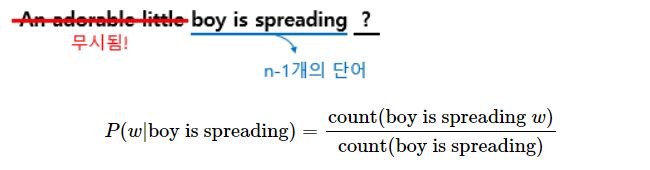

### 3) N-gram Language Model의 한계
n-gram은 뒤의 몇 개 단어만 봐서 의도하고 싶은 대로 문장을 끝맺음하지 못하는 경우가 생길 수 있다. => 전체 문장을 고려한 언어 모델보다는 정확도가 떨어질 수 밖에 없음.

#### 희소 문제(Sparsity Problem)
카운트 확률을 높일수는 있지만 여전히 sparsity problem이 존재함!      
              
#### n의 선택: trad-off 문제
- n을 크게 선택하면: 실제 훈련 corpus에서 해당 n-gram을 카운트할 확률이 적어저서 sparsity problem이 심각해짐. & 모델 사이즈가 커짐.
- 반대로 n을 작게 선택하면: 훈련 코퍼스에서 카운트는 잘 되겠지만 근사 정확도가 떨어짐       
=> n이 최대 5를 넘어서는 안된다고 권장됨!

### 4) 적용 분야(Domain)에 맞는 코퍼스 수집
마케팅이나 의료 등 특정 분야의 데이터를 사용한다면 해당 도메인의 코퍼스를 사용할 때 성능이 높아짐.        
도메인 코퍼스에 따라 성능이 비약적으로 달라지는게 언어 모델의 약점이 될 수 있음.

#### 5) 인공 신경망을 이용한 언어 모델 (Neural Network Based Language Model)
언어 모델보다 나은 성능 구현=> 8단원에서 다룬다~!

## 4. Perplexity
모델 내에서 자신의 성능을 수치화하여 결과를 내놓는 방식의 내부 평가 지표(Intrinsic evaluation)

### 언어 모델 평가방법(Evaluation metric): PPL(Perplexity)
: 선택할 수 있는 가능한 경우의 수(=> 분기계수=branching factor).      
언어 모델이 특정 시점에서 평균적으로 몇 개의 선택지를 가지고 있는지를 의미한다.      
낮을수록 언어 모델의 성능이 좋음. -> PPL을 최소화한다는 것은 문장의 확률을 최대화하는 것과 같다.

문장 W의 길이가 N이라고 할 때의 PPL
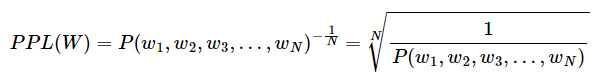

- 문장의 확률에 chain rule 적용
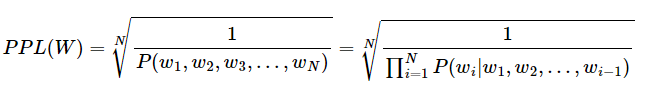
- n-gram 적용 (밑의 예: bigram)
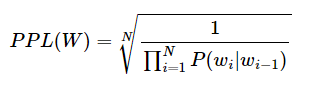